# Features - Bureau Balance

In [52]:
### set up system path to access helpers functions

import sys
import os

# Get the path to the 'src' directory
src_path = os.path.abspath(os.path.join(os.getcwd(), '../src'))

# Add the 'src' folder to sys.path
if src_path not in sys.path:
  sys.path.append(src_path)

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from helpers import *

In [54]:
# import bureau balance as df

df = pd.read_csv('../data/bureau_balance.csv')

In [55]:
# check df

df.head(20)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


In [56]:
# check value types of STATUS

df['STATUS'].value_counts()

STATUS
C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: count, dtype: int64

In [57]:
# C = closed, X = status unknown, 0 = no days past due
# replace C and X both with 0

df['STATUS'] = df['STATUS'].replace({'C': 0, 'X': 0, '0': 0, '1': 1, '2':2, '3': 3, '4': 4, '5': 5})

df['STATUS'].value_counts();

/var/folders/bh/crnltg950_n8l07mfm97qdtc0000gn/T/ipykernel_58170/4146746242.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['STATUS'] = df['STATUS'].replace({'C': 0, 'X': 0, '0': 0, '1': 1, '2':2, '3': 3, '4': 4, '5': 5})


STATUS
0    26956982
1      242347
5       62406
2       23419
3        8924
4        5847
Name: count, dtype: int64

- there are 2 methods of utilizing the information from STATUS
  1. Get the average per loan
  2. Get the total per loan 

### 1. Get the average per loan

In [58]:
# group by the SK_ID_BUREAU, aggregate using mean

status_per_loan_mean = pd.DataFrame(df.groupby('SK_ID_BUREAU')['STATUS'].mean()).reset_index()
status_per_loan_mean.columns = ['SK_ID_BUREAU', 'bureau_balance_status_mean']
status_per_loan_mean

,SK_ID_BUREAU,bureau_balance_status_mean
0,5001709,0.000000
1,5001710,0.000000
2,5001711,0.000000
3,5001712,0.000000
4,5001713,0.000000
...,...,...
817390,6842884,0.000000
817391,6842885,2.500000
817392,6842886,0.000000
817393,6842887,0.000000


In [60]:
# check the variance

status_per_loan_mean.describe()

,SK_ID_BUREAU,bureau_balance_status_mean
count,8.173950e+05,817395.000000
mean,6.022974e+06,0.021425
std,5.007138e+05,0.157726
min,5.001709e+06,0.000000
25%,5.700076e+06,0.000000
50%,6.061126e+06,0.000000
75%,6.430106e+06,0.000000
max,6.842888e+06,5.000000


### 2. Get the total per loan

In [61]:
# groupby the SK_ID_BUREAU, sum all the status

status_per_loan_sum = pd.DataFrame(df.groupby('SK_ID_BUREAU')['STATUS'].sum()).reset_index()
status_per_loan_sum.columns = ['SK_ID_BUREAU', 'bureau_balance_status_sum']
status_per_loan_sum

,SK_ID_BUREAU,bureau_balance_status_sum
0,5001709,0
1,5001710,0
2,5001711,0
3,5001712,0
4,5001713,0
...,...,...
817390,6842884,0
817391,6842885,60
817392,6842886,0
817393,6842887,0


In [63]:
# check the variance

status_per_loan_sum.describe()

,SK_ID_BUREAU,bureau_balance_status_sum
count,8.173950e+05,817395.000000
mean,6.022974e+06,0.796891
std,5.007138e+05,8.314905
min,5.001709e+06,0.000000
25%,5.700076e+06,0.000000
50%,6.061126e+06,0.000000
75%,6.430106e+06,0.000000
max,6.842888e+06,485.000000


- aggregate exasperates the overdue payments and increases the variance 
- sum is more indicative of poor credit behavior, but the data becomes very skewed
- both methods of aggregation need to be tested in the model to determine effectiveness

In [64]:
# import the bureau dataset to merge bureau balance into the main bureau dataset to get the SK_ID_CURR

bureau_df = pd.read_csv('../data/bureau.csv')

In [65]:
# check bureau_df

bureau_df.head(10)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.00,71017.38,108982.62,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.80,42103.80,0.00,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.00,0.00,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.70,0.00,0.00,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.00,0.00,0.00,0.0,Credit card,-690,NaN


In [66]:
# merge status_per_loan_mean into bureau_df

merged_bureau_balance = pd.merge(bureau_df, status_per_loan_mean, on='SK_ID_BUREAU', how='left')

# check for NaN's

merged_bureau_balance['bureau_balance_status_mean'].isna().sum()

np.int64(942074)

In [67]:
# fill NaN's with 0

merged_bureau_balance['bureau_balance_status_mean'] = merged_bureau_balance['bureau_balance_status_mean'].fillna(0)

In [68]:
# check nulls again

merged_bureau_balance['bureau_balance_status_mean'].isna().sum()

np.int64(0)

<Axes: >

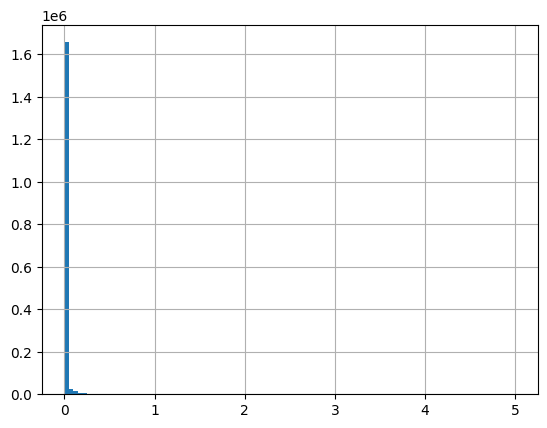

In [69]:
# check the distribution

merged_bureau_balance['bureau_balance_status_mean'].hist(bins=100)

In [70]:
# merge status_per_loan_sum into merged_bureau_balance

merged_bureau_balance = pd.merge(merged_bureau_balance, status_per_loan_sum, on='SK_ID_BUREAU', how='left')

merged_bureau_balance['bureau_balance_status_sum'].value_counts()

bureau_balance_status_sum
0.0      675703
1.0       46962
2.0       18363
3.0        8854
4.0        5374
          ...  
351.0         1
177.0         1
192.0         1
425.0         1
191.0         1
Name: count, Length: 307, dtype: int64

In [73]:
# check for nulls

merged_bureau_balance['bureau_balance_status_sum'].isna().sum()

np.int64(942074)

In [76]:
# fill nulls with 0

merged_bureau_balance['bureau_balance_status_sum'] = merged_bureau_balance['bureau_balance_status_sum'].fillna(0)

# check for null again

merged_bureau_balance['bureau_balance_status_sum'].isna().sum()

np.int64(0)

In [80]:
# groupby merged_bureau_balance using SK_ID_CURR, taking the average of avg_bb_status_sum

engineered_bb = pd.DataFrame(merged_bureau_balance.groupby('SK_ID_CURR')['bureau_balance_status_sum'].mean()).reset_index()
engineered_bb.columns = ['SK_ID_CURR', 'avg_bb_status_sum']
engineered_bb

,SK_ID_CURR,avg_bb_status_sum
0,100001,0.142857
1,100002,3.375000
2,100003,0.000000
3,100004,0.000000
4,100005,0.000000
...,...,...
305806,456249,0.000000
305807,456250,0.000000
305808,456253,0.000000
305809,456254,0.000000


In [81]:
# groupby merged_bureau_balance using SK_ID_CURR, taking the average of avg_bb_status_mean

status_mean_per_client = pd.DataFrame(merged_bureau_balance.groupby('SK_ID_CURR')['bureau_balance_status_mean'].mean()).reset_index()
status_mean_per_client.columns = ['SK_ID_CURR', 'avg_bb_status_mean']

# add to engineered dataframe

engineered_bb = pd.merge(engineered_bb, status_mean_per_client)
engineered_bb

,SK_ID_CURR,avg_bb_status_sum,avg_bb_status_mean
0,100001,0.142857,0.007519
1,100002,3.375000,0.255682
2,100003,0.000000,0.000000
3,100004,0.000000,0.000000
4,100005,0.000000,0.000000
...,...,...,...
305806,456249,0.000000,0.000000
305807,456250,0.000000,0.000000
305808,456253,0.000000,0.000000
305809,456254,0.000000,0.000000


In [82]:
# check for nulls and count

engineered_bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305811 entries, 0 to 305810
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   SK_ID_CURR          305811 non-null  int64  
 1   avg_bb_status_sum   305811 non-null  float64
 2   avg_bb_status_mean  305811 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 7.0 MB


In [84]:
# export to be used to merge into main application dataset

# engineered_bb.to_csv('../data/engineered_bureau_balance.csv', index=False)